# IRIS Data Project
For this project we will be working with the Iris Data Set. This is a very famous data set and quite many papers have been published on the same!

We'll be trying to predict a classification- What type of flower is it. Let's begin our understanding of implementing K-Nearest Neighbour in Python for classification.

We'll use the raw version of the data set (the one provided), and perform some categorical variables encoding (dummy variables) in python for quite many features if required.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## The Data

Let's start by reading in the adult.csv file into a pandas dataframe.

In [3]:
df = pd.read_csv('iris-dataset.csv', names=['col1','col2','col3','col4','type'])

In [4]:
df.head()

,col1,col2,col3,col4,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Checking if the data set contains any null value with heatmap

## Exploratory Data Analysis

Checking if we missed any null data to remove, i.e. checking if our data set still contains any null value.

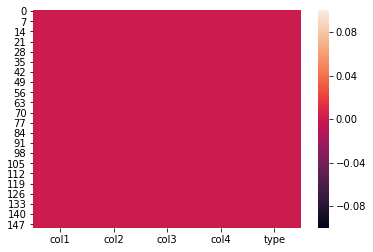

In [10]:
sns.heatmap(df.isnull())

#### From above heatmap, it is evident that our data does not contain any null value

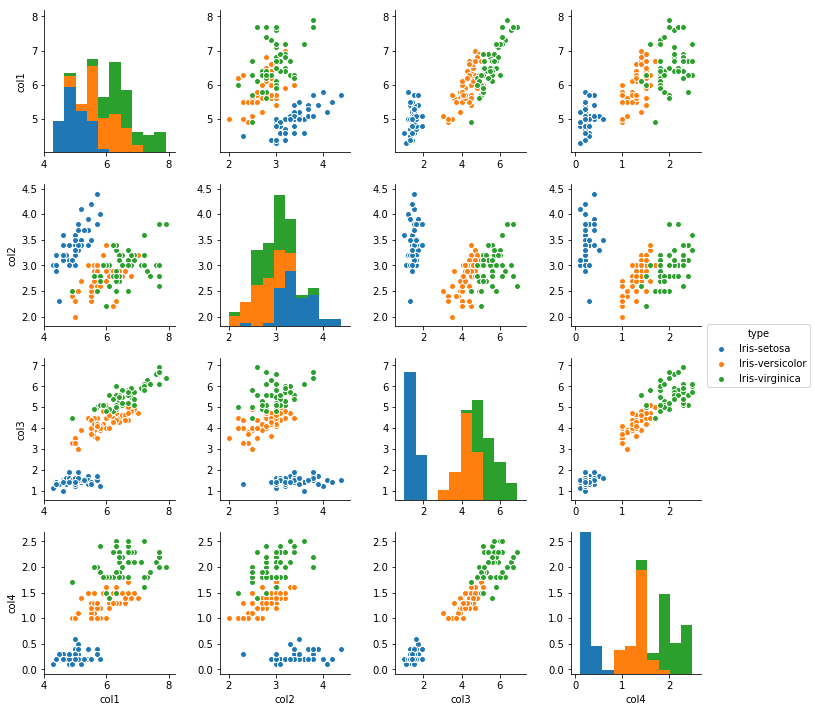

In [44]:
sns.pairplot(df, hue='type')

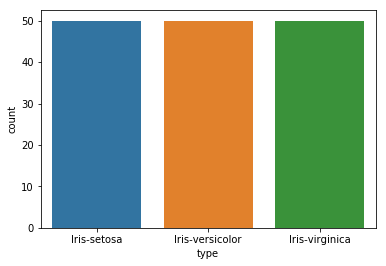

In [47]:
sns.countplot(df.type)

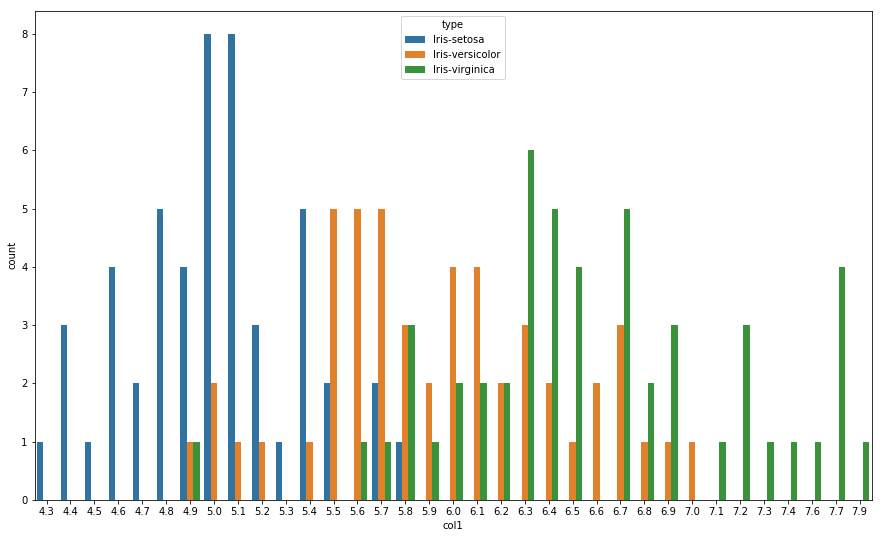

In [51]:
plt.figure(figsize=(15,9))
sns.countplot(df.col1, hue=df['type'], )

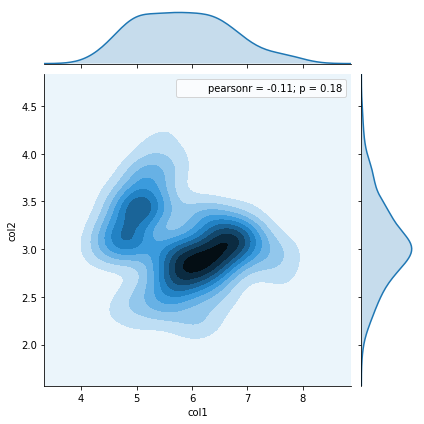

In [46]:
sns.jointplot(df.col1, df.col2, kind='kde')

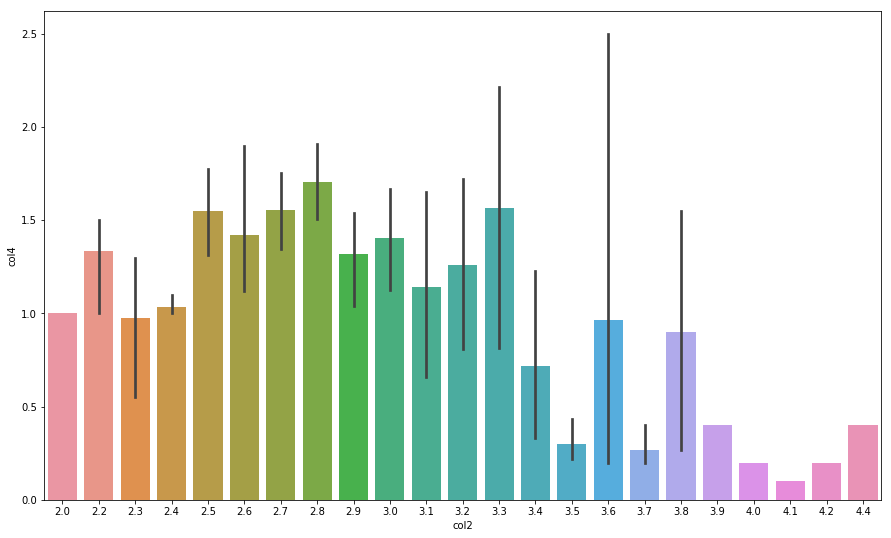

In [53]:
plt.figure(figsize=(15,9))
sns.barplot(df.col2, df.col4)

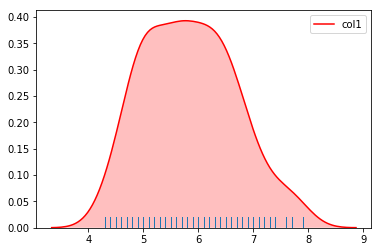

In [55]:
sns.kdeplot(df.col1, shade=True, color='r')
sns.rugplot(df.col1)

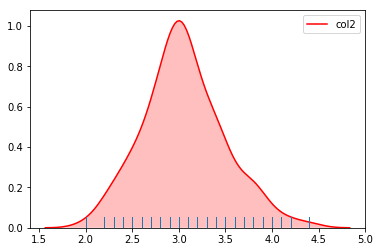

In [57]:
sns.kdeplot(df.col2, shade=True, color='r')
sns.rugplot(df.col2)

## Feature Scaling

Normalising the data using scikit learn Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler

### Scaling Training Data

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df.drop('type', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaled = scaler.transform(df.drop('type', axis=1))

In [15]:
data = pd.DataFrame(scaled, columns=df.columns[:-1])

In [17]:
data.head()

,col1,col2,col3,col4
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Scaling Test Data

In [27]:
df2 = pd.read_csv('iris-test.csv', names=['col1', 'col2', 'col3', 'col4'])

In [28]:
df2.head()

,col1,col2,col3,col4
0,4.3,2.9,1.7,0.3
1,4.6,2.7,1.5,0.2
2,5.3,3.4,1.6,0.2
3,5.2,4.1,1.5,0.1
4,6.0,2.2,4.2,1.0


In [29]:
scaler2 = StandardScaler()

In [30]:
scaler2.fit(df2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
scaled2 = scaler2.transform(df2)

In [34]:
test_data = pd.DataFrame(scaled2, columns=df.columns[:-1])

In [36]:
X_train = data
y_train = df['type']

In [37]:
X_test = test_data

## Initializing, Training & Predicting the model
Initially training the model on assumption of k='3'. Later we will use elbow method to derive the best probable value of 'K'

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [41]:
pred = knn.predict(X_test)

We have made the predictions against the test Data. Lets see what those are

In [42]:
pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

Now we don't have the actual data (y_test), hence we can't evaluate the model. Thus concludes our project.